<a href="https://colab.research.google.com/github/xmfaizan/pizza-vs-icecream-classif/blob/main/pizza_v_icecream_classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Dataset - https://www.kaggle.com/datasets/hemendrasr/pizza-vs-ice-cream

In [1]:
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d hemendrasr/pizza-vs-ice-cream

Dataset URL: https://www.kaggle.com/datasets/hemendrasr/pizza-vs-ice-cream
License(s): other
 82% 34.0M/41.7M [00:00<00:00, 72.1MB/s]
100% 41.7M/41.7M [00:00<00:00, 68.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pizza-vs-ice-cream.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [12]:
#generators
trained_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/train' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    image_size = (256,256)
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/valid' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    image_size = (256,256)
)

Found 718 files belonging to 2 classes.
Found 208 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

trained_ds = trained_ds.map(process)
valid_ds = valid_ds.map(process)

In [14]:
#CNN Model

In [15]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [18]:
res = model.fit(trained_ds,epochs=5,validation_data=valid_ds)

Epoch 1/5
23/23 [==============================] - 13s 177ms/step - loss: 0.7222 - accuracy: 0.6031 - val_loss: 0.5492 - val_accuracy: 0.6971
Epoch 2/5
23/23 [==============================] - 3s 100ms/step - loss: 0.4517 - accuracy: 0.8050 - val_loss: 0.3209 - val_accuracy: 0.8462
Epoch 3/5
23/23 [==============================] - 3s 93ms/step - loss: 0.3396 - accuracy: 0.8579 - val_loss: 0.2856 - val_accuracy: 0.8798
Epoch 4/5
23/23 [==============================] - 4s 137ms/step - loss: 0.2321 - accuracy: 0.8983 - val_loss: 0.3115 - val_accuracy: 0.8846
Epoch 5/5
23/23 [==============================] - 3s 94ms/step - loss: 0.1654 - accuracy: 0.9373 - val_loss: 0.4449 - val_accuracy: 0.8365


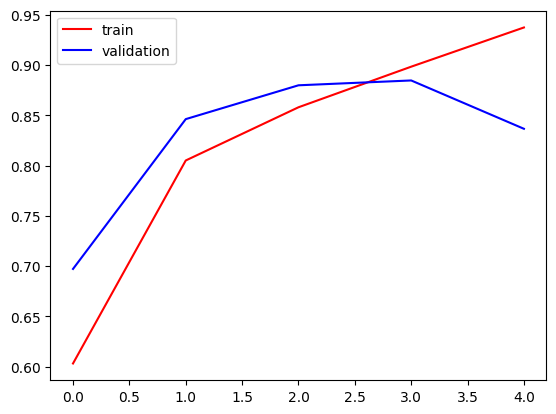

In [19]:
import matplotlib.pyplot as plt

plt.plot(res.history['accuracy'],color='red',label='train')
plt.plot(res.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

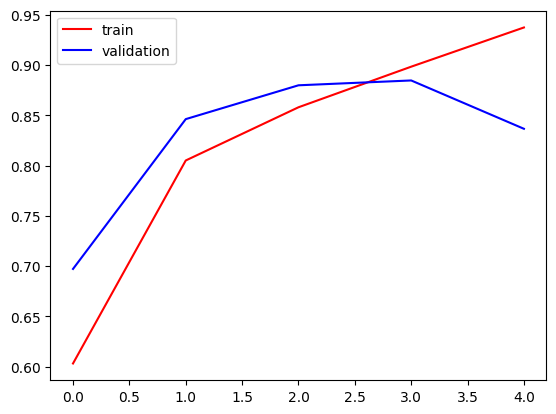

In [20]:
plt.plot(res.history['accuracy'],color='red',label='train')
plt.plot(res.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [67]:
# Ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity